# Project 2 - Iowa Liquor Sales
## Scenario 2
## Aakash Tandel 


# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data into a DataFrame
raw_data = pd.read_csv('/Users/aakashtandel/Desktop/Iowa_Liquor_Sales_reduced.csv')

# Transform the dates if needed, e.g.
#raw_data["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

/Users/aakashtandel/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
raw_data.head()

Date  Store Number         City Zip Code  County Number      County  \
0  03/31/2016          5029    DAVENPORT    52806           82.0       Scott   
1  03/31/2016          5029    DAVENPORT    52806           82.0       Scott   
2  03/31/2016          4959  CEDAR FALLS    50613            7.0  Black Hawk   
3  03/31/2016          2190   DES MOINES    50314           77.0        Polk   
4  03/31/2016          5240  WEST BRANCH    52358            NaN         NaN   

    Category       Category Name  Vendor Number  Item Number  \
0  1022100.0             TEQUILA            370        87152   
1  1022100.0             TEQUILA            395        89197   
2  1071100.0  AMERICAN COCKTAILS            380        63959   
3  1031200.0      VODKA FLAVORED            205        40597   
4  1081200.0      CREAM LIQUEURS            305        73055   

                        Item Description  Bottle Volume (ml)  \
0                           Avion Silver                 375   
1  Jose Cuervo Especial Reposado Tequila                1000   
2         Uv Blue Raspberry Lemonade Pet                1750   
3                New Amsterdam Red Berry                 200   
4                               Rumchata                 750   

  State Bottle Cost State Bottle Retail  Bottles Sold Sale (Dollars)  \
0             $9.99              $14.99            12        $179.88   
1            $12.50              $18.75             2         $37.50   
2             $5.97               $8.96             6         $53.76   
3             $2.24               $3.36            48        $161.28   
4            $12.50              $18.75             6        $112.50   

   Volume Sold (Liters)  Volume Sold (Gallons)  
0                   4.5                   1.19  
1                   2.0                   0.53  
2                  10.5                   2.77  
3                   9.6                   2.54  
4                   4.5                   1.19

In [5]:
raw_data.tail()

Date  Store Number             City Zip Code  County Number  \
2709547  01/05/2015          4696  WEST DES MOINES    50266           77.0   
2709548  01/05/2015          2590     CEDAR RAPIDS    52402           57.0   
2709549  01/05/2015          3631          AUDUBON    50025            5.0   
2709550  01/05/2015          2517           NEWTON    50208           50.0   
2709551  01/05/2015          2643         WATERLOO    50701            7.0   

             County   Category       Category Name  Vendor Number  \
2709547        Polk  1031200.0      VODKA FLAVORED            205   
2709548        Linn  1012200.0     SCOTCH WHISKIES            260   
2709549     Audubon  1081330.0      PEACH SCHNAPPS             65   
2709550      Jasper  1071100.0  AMERICAN COCKTAILS            395   
2709551  Black Hawk  1012200.0     SCOTCH WHISKIES            260   

         Item Number                            Item Description  \
2709547        40192                     New Amsterdam Pineapple   
2709548         5346                          Johnnie Walker Red   
2709549        82847                          Dekuyper Peachtree   
2709550        58868  Jose Cuervo Authentic Strawberry Margarita   
2709551         5329                         Johnnie Walker Blue   

         Bottle Volume (ml) State Bottle Cost State Bottle Retail  \
2709547                 375             $3.50               $5.25   
2709548                 750            $14.25              $21.38   
2709549                1000             $7.62              $11.43   
2709550                1750             $8.20              $12.30   
2709551                 750           $130.00             $195.00   

         Bottles Sold Sale (Dollars)  Volume Sold (Liters)  \
2709547             6         $31.50                  2.25   
2709548             4         $85.52                  3.00   
2709549             2         $22.86                  2.00   
2709550             6         $73.80                 10.50   
2709551             1        $195.00                  0.75   

         Volume Sold (Gallons)  
2709547                   0.59  
2709548                   0.79  
2709549                   0.53  
2709550                   2.77  
2709551                   0.20

The data seems to contain wholes sales information for Iowa liquor sales on given dates in 2015 and 2016. This is a transaction-based observation data set. Each observation is unique to the alcohol sold and the quantity at which it was sold. Additional location information, vender information, and sales information is included in each observation.

It seems there is missing data on 1077 county location observations, though by cross-referencing the Zip Code and City, we could deduce the County and County Number. We are also missing some information about the Category of 68 sales and the Category Name of 632. For a data set of this size, this is relatively few missing values. I will drop these values. But the best way to handle these missing values would be to cross-reference them (along with all other location information like the county, zip code, and city data) with another data source. The state of Iowa may have demographic data that could prove very helpful in this regard.

In [6]:
raw_data.shape

(2709552, 18)

In [7]:
raw_data.dropna(inplace=True)

In [8]:
raw_data.shape

(2692602, 18)

In [9]:
raw_data.isnull().sum()

Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [10]:
raw_data.duplicated().sum()

2973

In [11]:
raw_data[raw_data.duplicated()]

Date  Store Number             City Zip Code  County Number  \
3861     03/31/2016          4829       DES MOINES    50314           77.0   
4790     03/31/2016          5101         WATERLOO    50701            7.0   
10540    03/30/2016          2178           WAUKON    52172            3.0   
13202    03/30/2016          2285        IOWA CITY    52240           52.0   
13264    03/30/2016          3773     CEDAR RAPIDS    52401           57.0   
16034    03/30/2016          4973       WEST UNION    52175           33.0   
16976    03/30/2016          2285        IOWA CITY    52240           52.0   
16991    03/30/2016          2285        IOWA CITY    52240           52.0   
19925    03/29/2016          4106          DUBUQUE    52002           31.0   
22080    03/29/2016          4106          DUBUQUE    52002           31.0   
22261    03/29/2016          4334          DUBUQUE    52001           31.0   
23197    03/29/2016          4106          DUBUQUE    52002           31.0   
23200    03/29/2016          4106          DUBUQUE    52002           31.0   
23612    03/29/2016          4334          DUBUQUE    52001           31.0   
23798    03/29/2016          4334          DUBUQUE    52001           31.0   
23915    03/29/2016          4334          DUBUQUE    52001           31.0   
24740    03/29/2016          4334          DUBUQUE    52001           31.0   
24771    03/29/2016          4334          DUBUQUE    52001           31.0   
25170    03/29/2016          4106          DUBUQUE    52002           31.0   
25700    03/29/2016          4106          DUBUQUE    52002           31.0   
25867    03/29/2016          4106          DUBUQUE    52002           31.0   
27172    03/29/2016          4106          DUBUQUE    52002           31.0   
27187    03/29/2016          4106          DUBUQUE    52002           31.0   
27489    03/29/2016          4334          DUBUQUE    52001           31.0   
27496    03/29/2016          4106          DUBUQUE    52002           31.0   
27516    03/29/2016          4106          DUBUQUE    52002           31.0   
27634    03/29/2016          4106          DUBUQUE    52002           31.0   
27806    03/29/2016          4106          DUBUQUE    52002           31.0   
27930    03/29/2016          4106          DUBUQUE    52002           31.0   
31906    03/28/2016          3525       WASHINGTON    52353           92.0   
...             ...           ...              ...      ...            ...   
2660756  01/12/2015          4829       DES MOINES    50314           77.0   
2661277  01/12/2015          3952       BETTENDORF    52722           82.0   
2661310  01/12/2015          4742   COUNCIL BLUFFS    51501           78.0   
2661762  01/12/2015          2517           NEWTON    50208           50.0   
2662102  01/12/2015          2517           NEWTON    50208           50.0   
2663167  01/12/2015          2517           NEWTON    50208           50.0   
2666024  01/08/2015          4804       DES MOINES    50312           77.0   
2666225  01/08/2015          4829       DES MOINES    50314           77.0   
2666277  01/08/2015          4804       DES MOINES    50312           77.0   
2666701  01/08/2015          4804       DES MOINES    50312           77.0   
2667829  01/08/2015          2663        URBANDALE    50322           77.0   
2668844  01/08/2015          4068  WEST DES MOINES    50265           77.0   
2668914  01/08/2015          4829       DES MOINES    50314           77.0   
2669032  01/08/2015          4829       DES MOINES    50314           77.0   
2669499  01/08/2015          4829       DES MOINES    50314           77.0   
2669615  01/08/2015          4804       DES MOINES    50312           77.0   
2670152  01/08/2015          4829       DES MOINES    50314           77.0   
2670973  01/08/2015          2663        URBANDALE    50322           77.0   
2671235  01/08/2015          4804       DES MOINES    50312           77.0   
2671335  01/08/2015          4829    

In [12]:
raw_data.drop_duplicates()  

Date  Store Number               City Zip Code  County Number  \
0        03/31/2016          5029          DAVENPORT    52806           82.0   
1        03/31/2016          5029          DAVENPORT    52806           82.0   
2        03/31/2016          4959        CEDAR FALLS    50613            7.0   
3        03/31/2016          2190         DES MOINES    50314           77.0   
5        03/31/2016          4988        CEDAR FALLS    50613            7.0   
6        03/31/2016          3993           WATERLOO    50701            7.0   
7        03/31/2016          5029          DAVENPORT    52806           82.0   
8        03/31/2016          5144             ANKENY    50021           77.0   
9        03/31/2016          5029          DAVENPORT    52806           82.0   
10       03/31/2016          5029          DAVENPORT    52806           82.0   
11       03/31/2016          5029          DAVENPORT    52806           82.0   
12       03/31/2016          5029          DAVENPORT    52806           82.0   
13       03/31/2016          5029          DAVENPORT    52806           82.0   
14       03/31/2016          5029          DAVENPORT    52806           82.0   
15       03/31/2016          5029          DAVENPORT    52806           82.0   
16       03/31/2016          4447          URBANDALE    50322           77.0   
17       03/31/2016          5029          DAVENPORT    52806           82.0   
18       03/31/2016          5029          DAVENPORT    52806           82.0   
19       03/31/2016          5029          DAVENPORT    52806           82.0   
20       03/31/2016          5029          DAVENPORT    52806           82.0   
21       03/31/2016          5029          DAVENPORT    52806           82.0   
22       03/31/2016          5029          DAVENPORT    52806           82.0   
23       03/31/2016          5034         MASON CITY    50401           17.0   
24       03/31/2016          5029          DAVENPORT    52806           82.0   
25       03/31/2016          5029          DAVENPORT    52806           82.0   
26       03/31/2016          5029          DAVENPORT    52806           82.0   
27       03/31/2016          5029          DAVENPORT    52806           82.0   
28       03/31/2016          4802         DES MOINES    50310           77.0   
29       03/31/2016          5029          DAVENPORT    52806           82.0   
30       03/31/2016          5029          DAVENPORT    52806           82.0   
...             ...           ...                ...      ...            ...   
2709522  01/05/2015          2527         DES MOINES    50315           77.0   
2709523  01/05/2015          3403  COLUMBUS JUNCTION    52738           58.0   
2709524  01/05/2015          4267              ANITA    50020           15.0   
2709525  01/05/2015          4229             HARLAN    51537           83.0   
2709526  01/05/2015          4794         BURLINGTON    52601           29.0   
2709527  01/05/2015          2560             MARION    52302           57.0   
2709528  01/05/2015          2558     MOUNT PLEASANT    52641           44.0   
2709529  01/05/2015          2573          MUSCATINE    52761           70.0   
2709530  01/05/2015          4188         HOLY CROSS    52053           31.0   
2709531  01/05/2015          2599         CORALVILLE    52241           52.0   
2709532  01/05/2015          3952         BETTENDORF    52722           82.0   
2709533  01/05/2015          3631            AUDUBON    50025            5.0   
2709534  01/05/2015          3773       CEDAR RAPIDS    52401           57.0   
2709535  01/05/2015          2643           WATERLOO    50701            7.0   
2709536  01/05/2015          2633         DES MOINES    50320           77.0   
2709537  01/05/2015          2648    WEST DES MOINES    50265           77.0   
2709538  01/05/2015          2506         BURLINGTON    52601           29.0   
2709539  01/05/2015          4164         BETTENDORF    52722           82.0   
2709540  01/05/

Removing the duplicated rows (2,973 observations) was necessary.

In [13]:
raw_data.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

Some of the columns will need changes to their type.

In [14]:
raw_data['Sale (Dollars)'] = raw_data['Sale (Dollars)'].str.replace('$', '')
raw_data['Sale (Dollars)'] = raw_data['Sale (Dollars)'].str.replace(',', '')
raw_data['Sale (Dollars)']
raw_data['Sale (Dollars)'] = raw_data['Sale (Dollars)'].astype(float)

In [15]:
#raw_data['State Bottle Cost'] = raw_data['State Bottle Cost'].str.replace('$', '')
#raw_data['State Bottle Cost'] = raw_data['State Bottle Cost'].str.replace(',', '')
#raw_data['State Bottle Cost']
#raw_data['State Bottle Cost'] = raw_data['State Bottle Cost'].astype(float)
#raw_data['State Bottle Cost']

In [16]:
raw_data['State Bottle Retail'] = raw_data['State Bottle Retail'].str.replace('$', '')
raw_data['State Bottle Retail'] = raw_data['State Bottle Retail'].str.replace(',', '')
raw_data['State Bottle Retail']
raw_data['State Bottle Retail'] = raw_data['State Bottle Retail'].astype(float)
raw_data['State Bottle Retail']

0           14.99
1           18.75
2            8.96
3            3.36
5           34.50
6           13.01
7           21.00
8           17.75
9           15.99
10          40.50
11          14.99
12          32.97
13          47.99
14          17.63
15          15.36
16           2.70
17          18.08
18          15.74
19          15.74
20          11.63
21           5.19
22           4.61
23           6.01
24          28.13
25          13.88
26           5.36
27           4.83
28          15.68
29           5.24
30           7.14
            ...  
2709522      7.50
2709523     17.63
2709524      9.45
2709525     10.76
2709526     18.46
2709527     19.88
2709528     12.48
2709529     16.50
2709530      8.55
2709531     12.30
2709532     22.49
2709533      7.13
2709534     40.50
2709535     10.67
2709536     19.50
2709537     37.01
2709538     23.63
2709539     13.59
2709540      9.75
2709541     28.50
2709542     16.49
2709543      1.70
2709544     10.67
2709545     12.75
2709546   

In [17]:
raw_data['Vendor Number'] = raw_data['Vendor Number'].astype(str)
raw_data['Store Number'] = raw_data['Store Number'].astype(str)

In [18]:
raw_data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

#### Checking Location Columns

In [19]:
raw_data["Zip Code"].value_counts()

50010    67655
52402    66719
52240    59278
50613    49999
51501    45909
52001    44837
50317    43455
50314    43054
50265    42801
52404    40536
50401    40089
52722    35410
52807    34705
52241    34241
52405    33299
52761    33265
50311    32404
51503    32155
50702    31656
50320    31053
52501    30182
50315    29969
52601    28744
52804    28557
50501    28118
50266    27670
50322    27621
50703    27461
52732    26860
50158    25567
         ...  
52653       15
50514       14
52625       14
50475       14
51358       14
50228       14
50601       13
50160       12
50002       12
50540       11
50621       11
52053       11
52031       11
51546       11
50665       10
51466       10
50535       10
52328       10
50240        9
50261        9
51551        9
51002        8
50569        7
50048        7
52306        7
50061        6
51453        6
52146        5
50210        3
50035        2
Name: Zip Code, Length: 767, dtype: int64

In [20]:
raw_data["City"].value_counts(dropna=False)

DES MOINES         236776
CEDAR RAPIDS       184697
DAVENPORT          115605
WATERLOO            84194
COUNCIL BLUFFS      80774
IOWA CITY           80161
SIOUX CITY          79012
AMES                75714
WEST DES MOINES     71571
DUBUQUE             68016
CEDAR FALLS         57154
ANKENY              47661
MASON CITY          41753
BETTENDORF          36674
CORALVILLE          35526
MUSCATINE           33611
BURLINGTON          30948
CLINTON             30605
FORT DODGE          29305
WINDSOR HEIGHTS     27581
MARSHALLTOWN        26691
NEWTON              25522
STORM LAKE          25373
URBANDALE           24219
MARION              24051
OTTUMWA             22426
ALTOONA             21256
JOHNSTON            21243
CLEAR LAKE          20859
SPENCER             19171
                    ...  
WALL LAKE             177
AFTON                 175
OTHO                  175
VAN METER             167
BUSSEY                165
MINDEN                162
STANWOOD              159
WELLSBURG   

In [21]:
raw_data["County"].value_counts(dropna=False)

Polk             490417
Linn             231045
Scott            166969
Black Hawk       150480
Johnson          133525
Pottawattamie     91610
Story             90093
Woodbury          85170
Dubuque           76430
Cerro Gordo       64265
Des Moines        40001
Muscatine         39569
Clinton           35106
Wapello           34719
Dickinson         34086
Lee               33574
Webster           30838
Marshall          29758
Jasper            28421
Buena Vista       27428
Dallas            27173
Marion            25803
Warren            24433
Bremer            22070
Poweshiek         21495
Boone             20513
Clay              19269
Jones             18499
Carroll           18453
O'Brien           17330
                  ...  
Wright             6821
Clarke             6756
Greene             6559
Humboldt           6236
Howard             6085
Ida                5932
Adair              5568
Grundy             5503
Pocahontas         5190
Lucas              4987
Mills           

In [22]:
raw_data["County Number"].value_counts(dropna=False)

77.0    490417
57.0    231045
82.0    166969
7.0     150480
52.0    133525
78.0     91610
85.0     90093
97.0     85170
31.0     76430
17.0     64265
29.0     40001
70.0     39569
23.0     35106
90.0     34719
30.0     34086
56.0     33574
94.0     30838
64.0     29758
50.0     28421
11.0     27428
25.0     27173
63.0     25803
91.0     24433
9.0      22070
79.0     21495
8.0      20513
21.0     19269
53.0     18499
14.0     18453
71.0     17330
         ...  
99.0      6821
20.0      6756
37.0      6559
46.0      6236
45.0      6085
47.0      5932
1.0       5568
38.0      5503
76.0      5190
59.0      4987
65.0      4938
19.0      4783
58.0      4598
13.0      4487
12.0      4164
39.0      4107
98.0      3831
41.0      3828
68.0      3611
72.0      3580
54.0      3404
87.0      2972
27.0      2465
5.0       2453
89.0      2387
2.0       2240
26.0      1926
80.0      1856
93.0      1579
36.0       229
Name: County Number, Length: 99, dtype: int64

For our location data, we can see that there are 100 county numbers, 99 counties, 383 cities, and 676 zip codes. This information is not verified. Again, it would be wise to cross-reference this data with the state's municipality records to make sure the location variables are properly accounted for.

#### Checking Liquor Type Information

In [23]:
raw_data["Category Name"].value_counts(dropna=False)

VODKA 80 PROOF                        352213
CANADIAN WHISKIES                     268729
STRAIGHT BOURBON WHISKIES             153269
SPICED RUM                            145180
VODKA FLAVORED                        141339
TEQUILA                               121235
BLENDED WHISKIES                      115634
WHISKEY LIQUEUR                       109318
IMPORTED VODKA                        107737
PUERTO RICO & VIRGIN ISLANDS RUM       99384
FLAVORED RUM                           72359
TENNESSEE WHISKIES                     71868
AMERICAN COCKTAILS                     67923
AMERICAN DRY GINS                      65371
AMERICAN GRAPE BRANDIES                64533
IMPORTED VODKA - MISC                  64426
MISC. IMPORTED CORDIALS & LIQUEURS     63238
CREAM LIQUEURS                         62306
SCOTCH WHISKIES                        52099
IMPORTED GRAPE BRANDIES                46276
IMPORTED SCHNAPPS                      42866
MISC. AMERICAN CORDIALS & LIQUEURS     33687
100 PROOF 

We have 73 different categories of alcohol. These are highly differentiated. If we were to analyze the categories further, it may be wise to group in broader categories. For example, all whiskeys and bourbons could be in one category, all vodkas in another, etc.

In [26]:
#raw_data.groupby('County').agg(['sum']).loc[:, ['Sale (Dollars)']]

In [27]:
#raw_data.groupby('City').agg(['count', 'mean',])
#raw_data.groupby('Store Number').agg(['count', 'mean','sum'])

The data above shows a quick breakdown of county level data. We are most interested in the average sales in each county and the number of sales in that county. We will refine the dataframe later to have this data more readily available.

There are 1400 unique stores in the data set. The sum of sales, average sale, and number of sales from particular liquor stores can be seen above. This information will also be helpful later on.

In [28]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

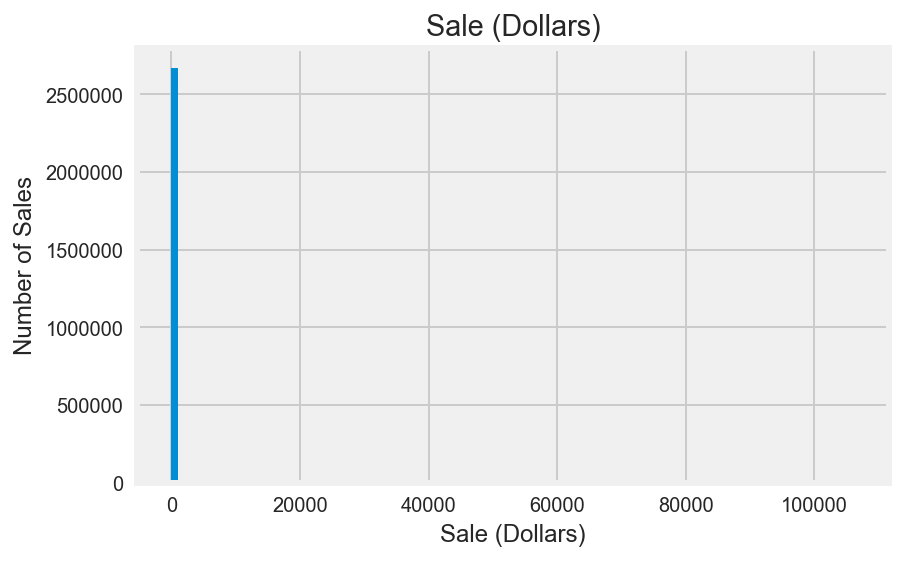

In [29]:
pd.DataFrame.hist(raw_data, column='Sale (Dollars)', bins=100)
plt.xlabel('Sale (Dollars)')
plt.ylabel('Number of Sales')

The vast majority of sales are less than 1000 dollars.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12aa667d0>]], dtype=object)

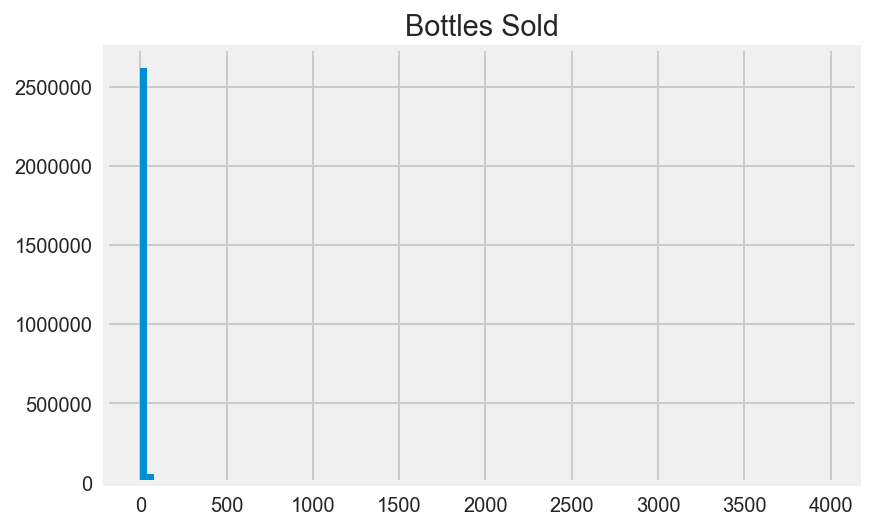

In [30]:
pd.DataFrame.hist(raw_data, column='Bottles Sold', bins=100)

The vast majority of the sales are of quantities (in bottles) of less than 100 bottles.

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


This is a large dataset and that is a great thing. When loading the full dataset, there will be upwards of 2.7 million observations. We removed the 35 duplicated columns from the dataframe, as well as the 1067 null values. Because of our large number of observations, this should have very little effect on our analysis. For our location data, we can see that there are 100 county numbers, 99 counties, 382 cities, and 412 zip codes. It would be wise to cross-reference this data with the state's municipality records to make sure the location variables are properly matched across city, county, and zip code. We see that a large number of observations are found in Polk County, the city of Des Moines, and the zip code 50010 (Ames, Iowa). Ames is the home of Iowa State. This makes logical sense because these are the main urban centers in the state of Iowa and a larger number of people should correlate positively with a higher number of liquor sales. We have 72 different categories of alcohol. These are highly differentiated. If we were to analyze the categories further, it may be wise to group in broader categories. For example, all whiskeys and bourbons could be in one category, all vodkas in another, etc. There are 1400 unique stores in the data set. The vast majority of sales are of quantities of less than 100 bottles and of transactions less than $1,000. We continue our analysis below.

Risks and Assumptions: One major assumption we will make is that the location data and sales data is correct. There are ways to verify both of these points, but that is beyond the scope of this project. Data entry error, missing information, and other data problems could drastically affect our predictive model. We are going to assume the data is valid after we corrected for the duplicated and missing values as stated above. Another assumption we are going to make is that the errors in sales data are normally distributed and not correlated. This could be violated if one Iowa liquor surveyor consistently erred in data entry in the same manner. For example, say this person accidently increased all of the Des Moines city sales data by a factor of 10 (incorrectly placing the decimal point in the data entry process). This would systematically correlate the error across multiple observations and violating the linear model assumptions.

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


It may be useful to have a year column. 

In [31]:
#raw_data['Date'] = pd.to_datetime(raw_data['Date'], infer_datetime_format=True)
#raw_data['Year'] = raw_data.Date.apply(lambda x : x.year)
#raw_data['Month'] = raw_data.Date.apply(lambda x : x.month)
#raw_data.head()

Looking at the dataframe above, we may have a fair amount of unncessary columns for our first model. The first model will be a regression of sales (dollars) on location, price per bottle, and bottles sold. We can condence the raw dataframe above into a smaller dataframe in order to make analysis more simple. The location parameter wil be a set of dummy variables for county. 

In [32]:
#continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]
dummy_df = pd.get_dummies(raw_data.County) #drop_first=True)
dummy_df.head()

Adair  Adams  Allamakee  Appanoose  Audubon  Benton  Black Hawk  Boone  \
0      0      0          0          0        0       0           0      0   
1      0      0          0          0        0       0           0      0   
2      0      0          0          0        0       0           1      0   
3      0      0          0          0        0       0           0      0   
5      0      0          0          0        0       0           1      0   

   Bremer  Buchanan   ...    Wapello  Warren  Washington  Wayne  Webster  \
0       0         0   ...          0       0           0      0        0   
1       0         0   ...          0       0           0      0        0   
2       0         0   ...          0       0           0      0        0   
3       0         0   ...          0       0           0      0        0   
5       0         0   ...          0       0           0      0        0   

   Winnebago  Winneshiek  Woodbury  Worth  Wright  
0          0           0         0      0       0  
1          0           0         0      0       0  
2          0           0         0      0       0  
3          0           0         0      0       0  
5          0           0         0      0       0  

[5 rows x 99 columns]

In [33]:
raw_short = raw_data.copy(deep=True)
raw_short = raw_short.drop('Date', axis=1)  
raw_short = raw_short.drop('Store Number', axis=1)  
raw_short = raw_short.drop('City', axis=1)  
raw_short = raw_short.drop('Zip Code', axis=1)  
raw_short = raw_short.drop('County Number', axis=1)  
raw_short = raw_short.drop('County', axis=1)  
raw_short = raw_short.drop('Category', axis=1)  
raw_short = raw_short.drop('Category Name', axis=1)  
raw_short = raw_short.drop('Vendor Number', axis=1)  
raw_short = raw_short.drop('Item Number', axis=1)  
raw_short = raw_short.drop('Item Description', axis=1)  
raw_short = raw_short.drop('Bottle Volume (ml)', axis=1)  
raw_short = raw_short.drop('State Bottle Cost', axis=1)  
raw_short = raw_short.drop('Volume Sold (Liters)', axis=1)  
raw_short = raw_short.drop('Volume Sold (Gallons)', axis=1)  
#raw_short = raw_short.drop('Year', axis=1)
#raw_short = raw_short.drop('Month', axis=1)  
raw_short.head()

State Bottle Retail  Bottles Sold  Sale (Dollars)
0                14.99            12          179.88
1                18.75             2           37.50
2                 8.96             6           53.76
3                 3.36            48          161.28
5                34.50             1           34.50

In [34]:
location_df = pd.concat([raw_short, dummy_df], axis=1)
location_df.head()

State Bottle Retail  Bottles Sold  Sale (Dollars)  Adair  Adams  Allamakee  \
0                14.99            12          179.88      0      0          0   
1                18.75             2           37.50      0      0          0   
2                 8.96             6           53.76      0      0          0   
3                 3.36            48          161.28      0      0          0   
5                34.50             1           34.50      0      0          0   

   Appanoose  Audubon  Benton  Black Hawk   ...    Wapello  Warren  \
0          0        0       0           0   ...          0       0   
1          0        0       0           0   ...          0       0   
2          0        0       0           1   ...          0       0   
3          0        0       0           0   ...          0       0   
5          0        0       0           1   ...          0       0   

   Washington  Wayne  Webster  Winnebago  Winneshiek  Woodbury  Worth  Wright  
0           0      0        0          0           0         0      0       0  
1           0      0        0          0           0         0      0       0  
2           0      0        0          0           0         0      0       0  
3           0      0        0          0           0         0      0       0  
5           0      0        0          0           0         0      0       0  

[5 rows x 102 columns]

The table above will provide all of the information for the first regression. 

We will need to pick features for the top county, but without knowing that county, it isn't worth assembling a table. 

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

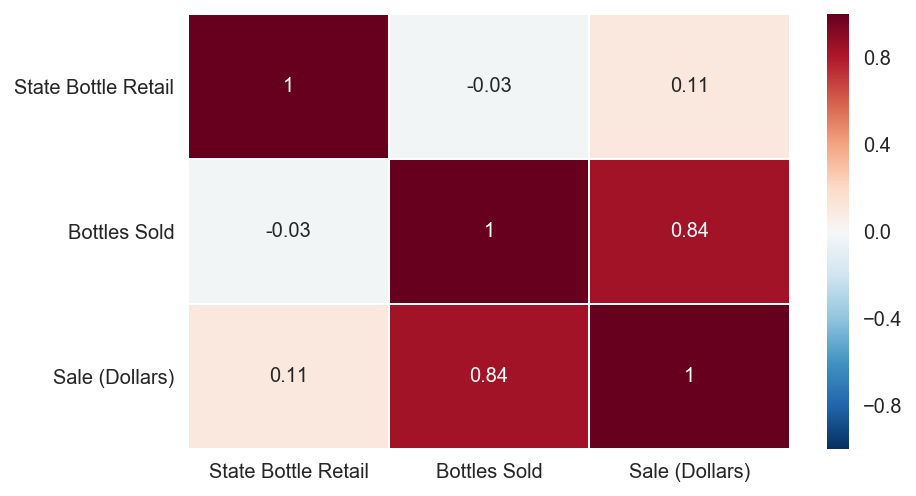

In [35]:
import seaborn.linearmodels as sblm
sns.heatmap(raw_short.corr(), annot = True, linewidths = 0.5)

With the heatmap above, we can see a strong, positive correlation between the number of bottles sold and our sales variable. This means it should be a good predictor for the amount of sales. The state bottle retail, which is basically price per bottle, has barely any correlation with sales. Overall, we will keep all three variables in the regression (along with the many county dummy variables). 

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

#### First Model
We will use the model below to determine which county has the highest predicted sales. 

In [39]:
import statsmodels.api as sm

/Users/aakashtandel/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [40]:
raw_shor = raw_short.copy(deep=True)
raw_shor = raw_shor.drop('Sale (Dollars)', axis=1)
raw_shor = sm.add_constant(raw_shor)
raw_shor.shape

(2692602, 3)

In [41]:
y = location_df['Sale (Dollars)']
y.shape

(2692602,)

In [42]:
model = sm.OLS(y, raw_shor).fit() 
predictions = model.predict(raw_shor)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                 3.402e+06
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:27:53   Log-Likelihood:            -1.8257e+07
No. Observations:             2692602   AIC:                         3.651e+07
Df Residuals:                 2692599   BIC:                         3.651e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -45.9937      0.165   -278.035      0.000     -46.318     -45.669
State Bottle Retail     2.3452      0.006    404.469      0.000       2.334       2.357
Bottles Sold           14.2793      0.006   2587.988      0.000      14.268      14.290
==============================================================================
Omnibus:                  5713267.125   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1234918455696.977
Skew:                          17.088   Prob(JB):                         0.00
Kurtosis:                    3320.536   Cond. No.                         36.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This shows that both State Bottle Retail and Bottles Sold are statistically significant factors in determining Sales for a given location. If the price per bottle increases by $1, all else equal, the Sales will increase by 2.35 dollars. If the number of bottles sold increases by 1 bottle, all else equal, the Sales will increase by  14.28 dollars.

In [43]:
dummy = dummy_df.copy(deep=True)
dummy = dummy.drop('Polk', axis=1)
dummy = sm.add_constant(dummy)
dummy.shape

(2692602, 99)

In [44]:
models_dm = sm.OLS(y, dummy).fit() 
predictions = models_dm.predict(dummy)
models_dm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     153.2
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:29:24   Log-Likelihood:            -1.9946e+07
No. Observations:             2692602   AIC:                         3.989e+07
Df Residuals:                 2692503   BIC:                         3.989e+07
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           159.3044      0.570    279.626      0.000     158.188     160.421
Adair           -64.1444      5.377    -11.930      0.000     -74.683     -53.606
Adams          -104.6476      8.449    -12.386      0.000    -121.207     -88.088
Allamakee       -65.6738      3.898    -16.849      0.000     -73.314     -58.034
Appanoose       -62.6156      3.942    -15.885      0.000     -70.341     -54.890
Audubon         -73.3025      8.075     -9.077      0.000     -89.130     -57.475
Benton          -65.3575      4.112    -15.895      0.000     -73.416     -57.299
Black Hawk      -27.7192      1.176    -23.576      0.000     -30.024     -25.415
Boone           -53.8013      2.843    -18.922      0.000     -59.374     -48.229
Bremer          -61.1726      2.745    -22.283      0.000     -66.553     -55.792
Buchanan        -60.3481      3.205    -18.830      0.000     -66.630     -54.067
Buena Vista     -79.8887      2.475    -32.272      0.000     -84.740     -75.037
Butler          -72.6955      6.209    -11.708      0.000     -84.865     -60.526
Calhoun         -66.5710      5.983    -11.126      0.000     -78.298     -54.844
Carroll          -3.9694      2.992     -1.327      0.185      -9.833       1.894
Cass            -45.3532      3.622    -12.522      0.000     -52.452     -38.255
Cedar           -95.3220      4.001    -23.827      0.000    -103.163     -87.481
Cerro Gordo     -49.9689      1.674    -29.855      0.000     -53.249     -46.688
Cherokee        -59.4635      4.238    -14.031      0.000     -67.770     -51.157
Chickasaw       -63.0824      5.797    -10.882      0.000     -74.444     -51.721
Clarke          -43.1521      4.887     -8.830      0.000     -52.731     -33.573
Clay            -60.5901      2.930    -20.679      0.000     -66.333     -54.847
Clayton         -92.6555      3.577    -25.906      0.000     -99.665     -85.645
Clinton         -41.2268      2.204    -18.704      0.000     -45.547     -36.907
Crawford        -26.2103      3.749     -6.990      0.000     -33.559     -18.862
Dallas           83.2332      2.486     33.475      0.000      78.360      88.106
Davis           -98.6212      9.109    -10.827      0.000    -116.474     -80.768
Decatur         -70.5215      8.056     -8.754      0.000     -86.311     -54.732
Delaware         -9.5176      4.723     -2.015      0.044     -18.774      -0.261
Des Moines      -42.0079      2.075    -20.249      0.000     -46.074     -37.942
Dickinson       -23.7712      2.235    -10.637      0.000     -28.151     -19.391
Dubuque         -20.1863      1.552    -13.011      0.000     -23.227     -17.145
Emmet           -64.5361      4.628    -13.945      0.000     -73.607     -55.465
Fayette         -30.6589      3.809     -8.049      0.000     -38.124     -23.194
Floyd           -11.8417      3.956     -2.994   

This regression shows that the location parameters alone do not do a very good job of fitting our sales data. The R-squared tells us very little of the variablity in Sales is accounted for by the location parameters. 

#### First Model

In [45]:
X = location_df.copy(deep=True)
X = X.drop('Sale (Dollars)', axis=1)
X = X.drop('Polk', axis=1)
X = sm.add_constant(X)
X.shape

(2692602, 101)

In [46]:
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 6.823e+04
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:30:24   Log-Likelihood:            -1.8254e+07
No. Observations:             2692602   AIC:                         3.651e+07
Df Residuals:                 2692501   BIC:                         3.651e+07
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -45.5472      0.324   -140.650      0.000     -46.182     -44.913
State Bottle Retail     2.3409      0.006    403.943      0.000       2.330       2.352
Bottles Sold           14.2862      0.006   2581.628      0.000      14.275      14.297
Adair                  -3.0032      2.868     -1.047      0.295      -8.625       2.619
Adams                  -0.4981      4.507     -0.111      0.912      -9.332       8.336
Allamakee               4.7681      2.079      2.293      0.022       0.692       8.844
Appanoose              -2.8343      2.103     -1.348      0.178      -6.956       1.287
Audubon                -6.8752      4.308     -1.596      0.110     -15.318       1.568
Benton                  2.9673      2.194      1.353      0.176      -1.332       7.267
Black Hawk            -20.0985      0.627    -32.044      0.000     -21.328     -18.869
Boone                   2.9701      1.517      1.958      0.050      -0.003       5.943
Bremer                  6.2725      1.465      4.283      0.000       3.402       9.143
Buchanan                0.7889      1.710      0.461      0.644      -2.562       4.140
Buena Vista             4.6905      1.321      3.551      0.000       2.102       7.279
Butler                 -6.1719      3.312     -1.863      0.062     -12.663       0.320
Calhoun                -3.1032      3.192     -0.972      0.331      -9.359       3.152
Carroll                14.5868      1.596      9.140      0.000      11.459      17.715
Cass                    7.6635      1.932      3.966      0.000       3.877      11.450
Cedar                  -1.2521      2.134     -0.587      0.557      -5.435       2.931
Cerro Gordo            -2.3907      0.893     -2.677      0.007      -4.141      -0.640
Cherokee              -10.8452      2.261     -4.797      0.000     -15.276      -6.414
Chickasaw               5.5266      3.092      1.787      0.074      -0.534      11.587
Clarke                 11.6455      2.607      4.467      0.000       6.536      16.755
Clay                    2.4379      1.563      1.560      0.119      -0.626       5.502
Clayton                 7.1429      1.908      3.743      0.000       3.403      10.883
Clinton                -7.0010      1.176     -5.954      0.000      -9.306      -4.696
Crawford               10.2215      2.000      5.111      0.000       6.301      14.142
Dallas                 56.2449      1.326     42.405      0.000      53.645      58.845
Davis                   4.4460      4.859      0.915      0.360      -5.077      13.969
Decatur                -1.2327      4.297     -0.287      0.774      -9.655       7.190
Delaware                4.6557      2.519      1.848      0.065      -0.282       9.593
Des Moines             -6.0531      1.107     -5.469      0.000      -8.222      -3.884
Dic

MSE: 3090145418.61


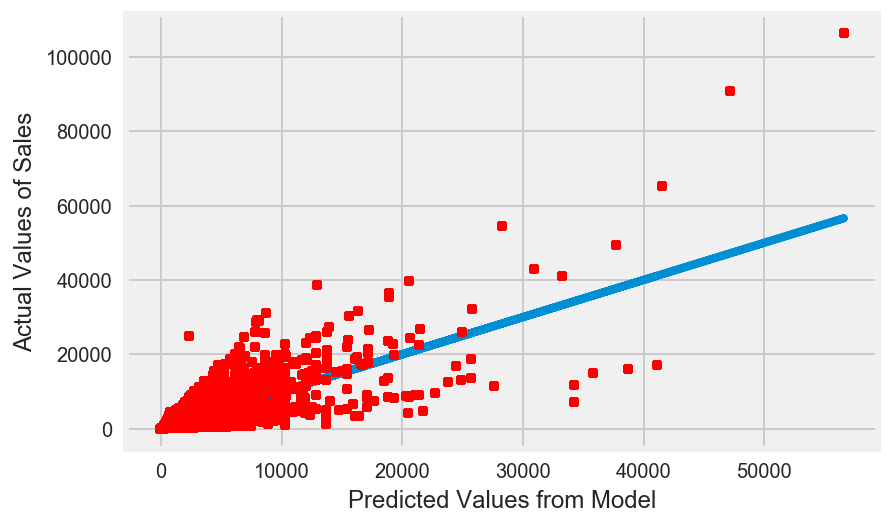

In [48]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Model")
plt.ylabel("Actual Values of Sales")
plt.plot(predictions, np.poly1d(np.polyfit(predictions, y, 1))(predictions))
print "MSE:", model.mse_model

#### First Conclusion
This linear regression answers our first question. We see that both Bottles Sold and State Bottle Retail remain statistically significant when we add in the location parameters to our model. This model is all relative to Polk County because we have excluded one dummy variable from our regression (to prevent falling into the dummy variable trap). The county that has the highest beta coefficient (which is a higher y-intercept for this dummy variable) is Dallas County. The dummy variable for Dallas County is also highly statistically significant. Based on this regression, we would say that opening a liquor store in Dallas County could potentially lead to more sales than opening a liquor store in other counties. Dallas County is located just west of Des Moines. 

Overall, we will need to find a way to minimize the MSE. 

#### Training Test Split
We will need to split our data between training data and test data in order to have a final testing scenario. 

In [49]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1884821, 101) (1884821,)
(807781, 101) (807781,)


In [51]:
lm = linear_model.LinearRegression()
model_sk = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#### K-Folds Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [53]:
# Perform 5-fold cross validation
scores = cross_val_score(model_sk, X_train, y_train, cv=5)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()

Cross-validated scores: [ 0.73179574  0.70579598  0.72602219  0.69669961  0.72415895]
Average:  0.716894492609


#### Now we can test our model. 

Cross-Predicted Accuracy: 0.70607685706


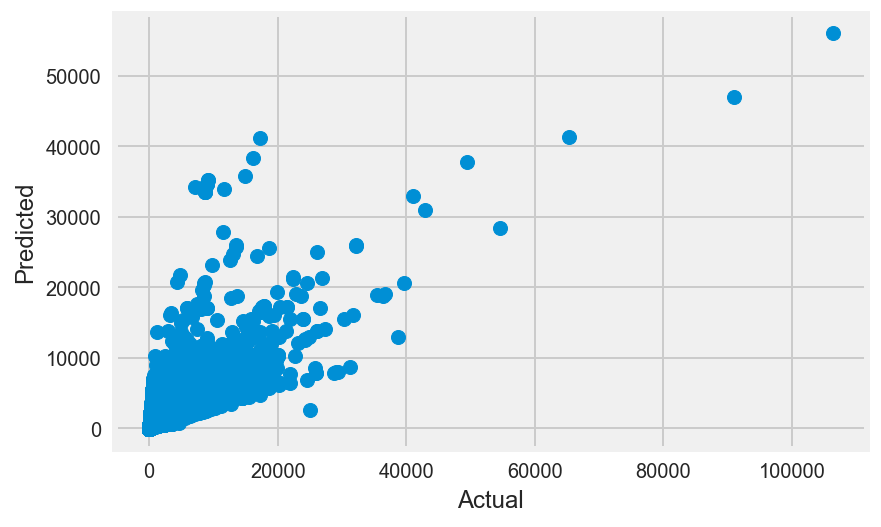

In [54]:
predictions = cross_val_predict(model_sk, X, y, cv=5)
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

#### Regularization
First we will pick the optimal lambda/alpha tuning parameter. Then we will regularize with a lasso regression. The remaining beta coefficients at the end of the regularization are the most important. 

In [55]:
# Select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=9)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

0.00024517622282058306

In [56]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
lassor = lassoreg.coef_
lassor

array([  0.        ,   2.20613658,  14.27932652,  -0.        ,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
         0.        , -15.31408459,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  41.38185706,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,   0.90721869,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.62056052,
        -2.78298467,   0.        ,   0.        ,  -0.  

In [57]:
labeled = zip(X.columns, lassor)
labeled

[('const', 0.0),
 ('State Bottle Retail', 2.2061365830959834),
 ('Bottles Sold', 14.27932652352113),
 ('Adair', -0.0),
 ('Adams', -0.0),
 ('Allamakee', 0.0),
 ('Appanoose', -0.0),
 ('Audubon', -0.0),
 ('Benton', 0.0),
 ('Black Hawk', -15.31408459311211),
 ('Boone', 0.0),
 ('Bremer', 0.0),
 ('Buchanan', -0.0),
 ('Buena Vista', 0.0),
 ('Butler', -0.0),
 ('Calhoun', -0.0),
 ('Carroll', 0.0),
 ('Cass', 0.0),
 ('Cedar', -0.0),
 ('Cerro Gordo', -0.0),
 ('Cherokee', -0.0),
 ('Chickasaw', 0.0),
 ('Clarke', 0.0),
 ('Clay', 0.0),
 ('Clayton', 0.0),
 ('Clinton', -0.0),
 ('Crawford', 0.0),
 ('Dallas', 41.381857061488382),
 ('Davis', 0.0),
 ('Decatur', -0.0),
 ('Delaware', 0.0),
 ('Des Moines', -0.0),
 ('Dickinson', 0.0),
 ('Dubuque', 0.0),
 ('Emmet', 0.0),
 ('Fayette', -0.0),
 ('Floyd', -0.0),
 ('Franklin', -0.0),
 ('Fremont', -0.0),
 ('Greene', 0.0),
 ('Grundy', -0.0),
 ('Guthrie', -0.0),
 ('Hamilton', -0.0),
 ('Hancock', -0.0),
 ('Hardin', 0.0),
 ('Harrison', 0.0),
 ('Henry', 0.0),
 ('Howard', 0

In [58]:
y_pred = lassoreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

210.579939952


Our Mean Squared Error has drastically dropped. It was originally 3090145418.61 with OLS estimates. With regularization, it is close to 200. 

#### Second Model
We will use the model below to determine how various factors effect sales in Dallas County, Iowa.

In [59]:
raw_data.head()

Date Store Number         City Zip Code  County Number      County  \
0  03/31/2016         5029    DAVENPORT    52806           82.0       Scott   
1  03/31/2016         5029    DAVENPORT    52806           82.0       Scott   
2  03/31/2016         4959  CEDAR FALLS    50613            7.0  Black Hawk   
3  03/31/2016         2190   DES MOINES    50314           77.0        Polk   
5  03/31/2016         4988  CEDAR FALLS    50613            7.0  Black Hawk   

    Category              Category Name Vendor Number  Item Number  \
0  1022100.0                    TEQUILA           370        87152   
1  1022100.0                    TEQUILA           395        89197   
2  1071100.0         AMERICAN COCKTAILS           380        63959   
3  1031200.0             VODKA FLAVORED           205        40597   
5  1011200.0  STRAIGHT BOURBON WHISKIES           260        17090   

                        Item Description  Bottle Volume (ml)  \
0                           Avion Silver                 375   
1  Jose Cuervo Especial Reposado Tequila                1000   
2         Uv Blue Raspberry Lemonade Pet                1750   
3                New Amsterdam Red Berry                 200   
5                   Bulleit Bourbon 10YR                 750   

  State Bottle Cost  State Bottle Retail  Bottles Sold  Sale (Dollars)  \
0             $9.99                14.99            12          179.88   
1            $12.50                18.75             2           37.50   
2             $5.97                 8.96             6           53.76   
3             $2.24                 3.36            48          161.28   
5            $23.00                34.50             1           34.50   

   Volume Sold (Liters)  Volume Sold (Gallons)  
0                  4.50                   1.19  
1                  2.00                   0.53  
2                 10.50                   2.77  
3                  9.60                   2.54  
5                  0.75                   0.20

In [60]:
dallas_co = raw_data.copy(deep=True)
dallas_county = dallas_co.drop(dallas_co[dallas_co.County != 'Dallas'].index, axis=0)
dallas_county

Date Store Number             City Zip Code  County Number  \
1761     03/31/2016         2612            PERRY    50220           25.0   
2776     03/31/2016         2612            PERRY    50220           25.0   
3129     03/31/2016         2612            PERRY    50220           25.0   
3248     03/31/2016         2612            PERRY    50220           25.0   
3269     03/31/2016         2612            PERRY    50220           25.0   
3273     03/31/2016         2612            PERRY    50220           25.0   
3274     03/31/2016         2612            PERRY    50220           25.0   
3275     03/31/2016         2612            PERRY    50220           25.0   
3276     03/31/2016         2612            PERRY    50220           25.0   
3277     03/31/2016         2612            PERRY    50220           25.0   
3278     03/31/2016         2612            PERRY    50220           25.0   
3279     03/31/2016         2612            PERRY    50220           25.0   
3280     03/31/2016         2612            PERRY    50220           25.0   
3281     03/31/2016         2612            PERRY    50220           25.0   
3282     03/31/2016         2612            PERRY    50220           25.0   
3284     03/31/2016         2612            PERRY    50220           25.0   
3285     03/31/2016         2612            PERRY    50220           25.0   
3287     03/31/2016         2612            PERRY    50220           25.0   
3288     03/31/2016         2612            PERRY    50220           25.0   
3290     03/31/2016         2612            PERRY    50220           25.0   
3292     03/31/2016         2612            PERRY    50220           25.0   
3293     03/31/2016         2612            PERRY    50220           25.0   
3294     03/31/2016         2612            PERRY    50220           25.0   
3295     03/31/2016         2612            PERRY    50220           25.0   
3296     03/31/2016         2612            PERRY    50220           25.0   
3298     03/31/2016         2612            PERRY    50220           25.0   
3299     03/31/2016         2612            PERRY    50220           25.0   
3300     03/31/2016         2612            PERRY    50220           25.0   
4352     03/31/2016         2612            PERRY    50220           25.0   
4361     03/31/2016         2612            PERRY    50220           25.0   
...             ...          ...              ...      ...            ...   
2704948  01/05/2015         2665           WAUKEE    50263           25.0   
2705026  01/05/2015         2665           WAUKEE    50263           25.0   
2705133  01/05/2015         3814  WEST DES MOINES    50266           25.0   
2705619  01/05/2015         2665           WAUKEE    50263           25.0   
2705737  01/05/2015         3814  WEST DES MOINES    50266           25.0   
2706001  01/05/2015         2665           WAUKEE    50263           25.0   
2706180  01/05/2015         2665           WAUKEE    50263           25.0   
2706194  01/05/2015         2665           WAUKEE    50263           25.0   
2706216  01/05/2015         2665           WAUKEE    50263           25.0   
2706397  01/05/2015         2665           WAUKEE    50263           25.0   
2706507  01/05/2015         2665           WAUKEE    50263           25.0   
2706705  01/05/2015         3814  WEST DES MOINES    50266           25.0   
2706714  01/05/2015         3814  WEST DES MOINES    50266           25.0   
2706777  01/05/2015         2665           WAUKEE    50263           25.0   
2706803  01/05/2015         3814  WEST DES MOINES    50266           25.0   
2706917  01/05/2015         2665           WAUKEE    50263           25.0   
2707278  01/05/2015         3814  WEST DES MOINES    50266           25.0   
2707284  01/05/2015         2665           WAUKEE    50263           25.0   
2707290  01/05/2015         3814  WEST DES MOINES    50266           25.0   
2707630  01/05/2015         2665           WAUKEE    50263           25.0   
2707913  01

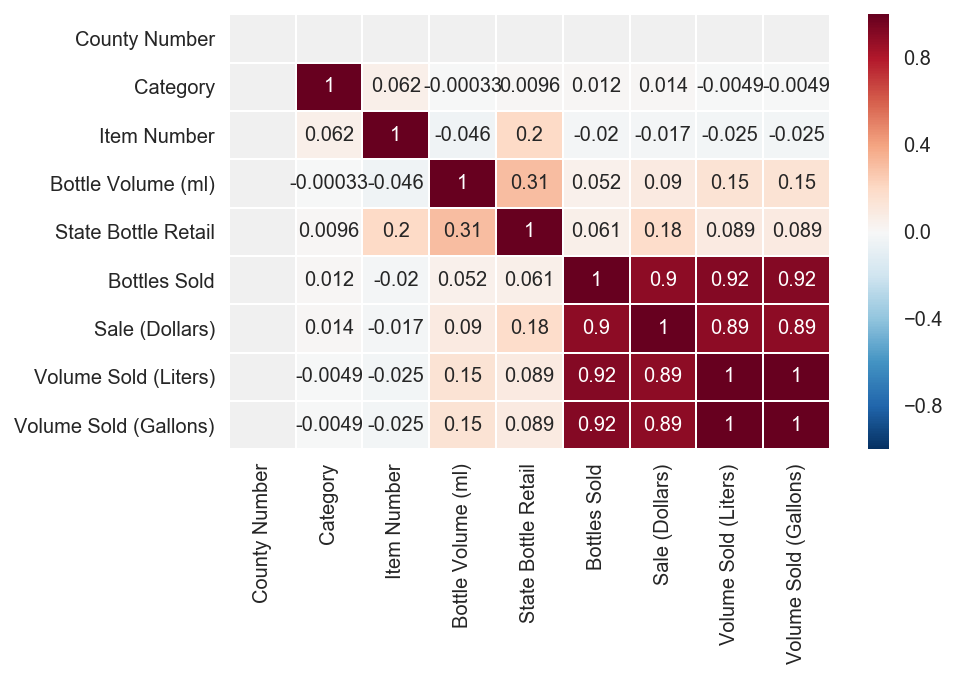

In [61]:
sns.heatmap(dallas_county.corr(), annot = True, linewidths = 0.5)

We can see that Volume Sold and Bottles Sold have correlations with Sales (Dollars). These would be good variables to include in our model. State Bottle Retail also has a light correlation, so we can include that variable as well. The rest of our variables have little effect on Sales Dollars so it doesn't make sense to include them. 

In [62]:
dallas_short = dallas_county.copy(deep=True)
dallas_short = dallas_short.drop('Date', axis=1)  
dallas_short = dallas_short.drop('Store Number', axis=1)  
dallas_short = dallas_short.drop('City', axis=1)  
dallas_short = dallas_short.drop('Zip Code', axis=1)  
dallas_short = dallas_short.drop('County Number', axis=1)  
dallas_short = dallas_short.drop('County', axis=1)  
dallas_short = dallas_short.drop('Category', axis=1)  
dallas_short = dallas_short.drop('Category Name', axis=1)  
dallas_short = dallas_short.drop('Vendor Number', axis=1)  
dallas_short = dallas_short.drop('Item Number', axis=1)  
dallas_short = dallas_short.drop('Item Description', axis=1)  
dallas_short = dallas_short.drop('Bottle Volume (ml)', axis=1)  
dallas_short = dallas_short.drop('State Bottle Cost', axis=1)  
dallas_short = dallas_short.drop('Volume Sold (Gallons)', axis=1)  
#dallas_short = dallas_short.drop('Year', axis=1)
#dallas_short = dallas_short.drop('Month', axis=1) 
dallas_short.head()

State Bottle Retail  Bottles Sold  Sale (Dollars)  Volume Sold (Liters)
1761                23.63             3           70.89                  5.25
2776                15.00             3           45.00                  2.25
3129                19.50             3           58.50                  5.25
3248                15.00             3           45.00                  2.25
3269                11.76             6           70.56                 10.50

In [63]:
y = dallas_short['Sale (Dollars)']
y.shape

(27173,)

In [64]:
X = dallas_short.copy(deep=True)
X = X.drop('Sale (Dollars)', axis=1)
X = sm.add_constant(X)
X.shape

(27173, 4)

In [79]:
model_dallas = sm.OLS(y, X).fit() 
predictionss = model_dallas.predict(X)
model_dallas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 4.988e+04
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        19:06:19   Log-Likelihood:            -2.0545e+05
No. Observations:               27173   AIC:                         4.109e+05
Df Residuals:                   27169   BIC:                         4.109e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -210.9330      4.798    -43.963      0.000    -220.337    -201.529
State Bottle Retail     12.2143      0.253     48.357      0.000      11.719      12.709
Bottles Sold            11.8311      0.143     82.480      0.000      11.550      12.112
Volume Sold (Liters)     7.4259      0.108     68.602      0.000       7.214       7.638
==============================================================================
Omnibus:                    43663.600   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        263520389.996
Skew:                           9.631   Prob(JB):                         0.00
Kurtosis:                     485.056   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

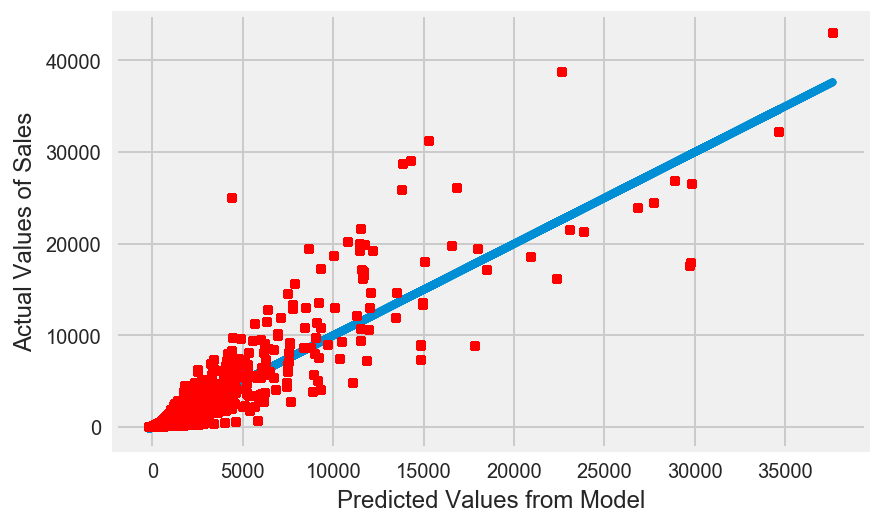

MSE: 3090145418.61


In [83]:
plt.scatter(predictionss, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Model")
plt.ylabel("Actual Values of Sales")
plt.plot(predictionss, np.poly1d(np.polyfit(predictionss, y, 1))(predictionss))
plt.show()
print "MSE:", model.mse_model

#### Second Conclusion
We see that all three variables we picked Volume Sold (Liters), Bottles Sold, and State Bottle Retail are all statistically significant. This shows that they all have significant effect on sales. 

In [84]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X, y, test_size=0.3)
print Xd_train.shape, yd_train.shape

(19021, 4) (19021,)


In [85]:
lm = linear_model.LinearRegression()
modeld_sk = lm.fit(Xd_train, yd_train)
predictions = lm.predict(Xd_test)

In [86]:
# Perform 5-fold cross validation
scores = cross_val_score(modeld_sk, Xd_train, yd_train, cv=10)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()

Cross-validated scores: [ 0.75768897  0.81734653  0.91291931  0.81967844  0.87208049  0.80590374
  0.91466607  0.92448638  0.84715162  0.85472557]
Average:  0.852664712172


Cross-Predicted Accuracy: 0.843205559238


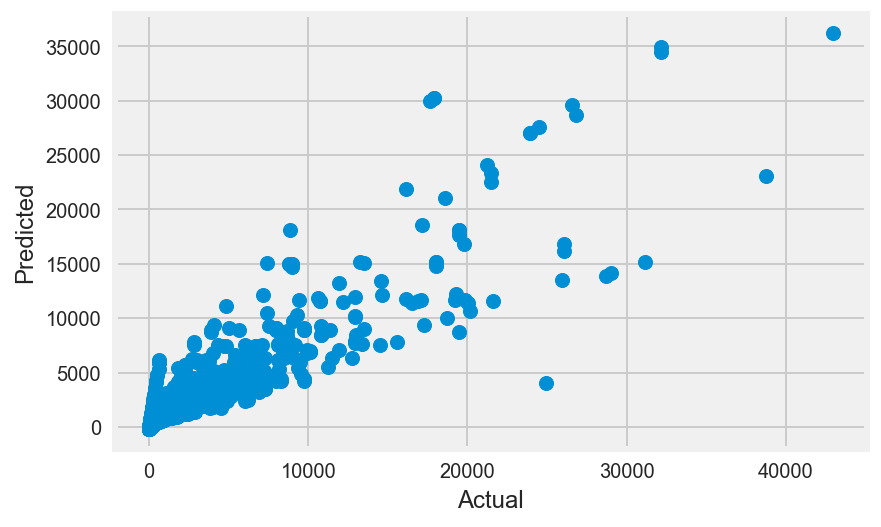

In [87]:
predictions = cross_val_predict(modeld_sk, X, y, cv=10)
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [88]:
# Select the best alpha with LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=9)
lassoregcv.fit(Xd_train, yd_train)
lassoregcv.alpha_

0.0079916409177071008

In [89]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=3, normalize=True)
lassoreg.fit(Xd_train, yd_train)
lassord = lassoreg.coef_
lassord

array([ 0.        ,  0.        ,  8.3169473 ,  3.85348324])

In [90]:
labeled_d = zip(X.columns, lassord)
labeled_d

[('const', 0.0),
 ('State Bottle Retail', 0.0),
 ('Bottles Sold', 8.3169473038918031),
 ('Volume Sold (Liters)', 3.8534832423293013)]

In [91]:
yd_pred = lassoreg.predict(Xd_test)
print np.sqrt(metrics.mean_squared_error(yd_test, yd_pred))

667.014126386


Using a lasso regression, we have much smaller MSE. We also see that Bottles Sold has the biggest effect on Sales Dollars in Dallas County. Thus, we will find the stores in the county that have the highest number of Bottles Sold. Thus, if we were to make a recommendation to a store opening in Dallas County, it would be that maximizing the number of bottles sold is the highest way to increase sales. Sheer number of bottles sold is a better predictor of high sales than item type, average volume of bottle, or anything else. 

In [139]:
df_dal = dallas_county.copy(deep=True)
df_dal = df_dal.drop('Date', axis=1)  
df_dal = df_dal.drop('City', axis=1)  
df_dal = df_dal.drop('Zip Code', axis=1)  
df_dal = df_dal.drop('County Number', axis=1)  
df_dal = df_dal.drop('County', axis=1)  
df_dal = df_dal.drop('Category', axis=1)  
df_dal = df_dal.drop('Category Name', axis=1)  
df_dal = df_dal.drop('Vendor Number', axis=1)  
df_dal = df_dal.drop('Item Number', axis=1)  
df_dal = df_dal.drop('Item Description', axis=1)  
df_dal = df_dal.drop('Bottle Volume (ml)', axis=1)  
df_dal = df_dal.drop('State Bottle Cost', axis=1)  
df_dal = df_dal.drop('Volume Sold (Gallons)', axis=1)  
df_dal.head()

Store Number  State Bottle Retail  Bottles Sold  Sale (Dollars)  \
1761         2612                23.63             3           70.89   
2776         2612                15.00             3           45.00   
3129         2612                19.50             3           58.50   
3248         2612                15.00             3           45.00   
3269         2612                11.76             6           70.56   

      Volume Sold (Liters)  
1761                  5.25  
2776                  2.25  
3129                  5.25  
3248                  2.25  
3269                 10.50

In [141]:
#df.groupby('Zip Code')['Sale (Dollars)'].sum().sort_values(ascending=False)
df_dal.groupby('Store Number')['Bottles Sold'].sum().sort_values(ascending=False)

Store Number
3814    135035
2665    112761
4678     22177
2612     22039
5123     16967
4137     15519
4384      8056
4411      6316
4868      5157
4378      4992
4873      4805
4359      4711
4917      3628
4577      3402
4792      2763
4929      2756
4623      2564
Name: Bottles Sold, dtype: int64

As we can see above, the store with the higest number of bottles sold in Dallas County is store 3814. More information on this store and the other top five stores would be greatly beneficial. 

In [142]:
#dallas_short.sort_values('Bottles Sold', ascending=False)

In [143]:
#dallas_s = dallas_county.copy(deep=True)
##dallas_s = dallas_s.drop('Date', axis=1)  
#dallas_s = dallas_s.drop('City', axis=1)  
#dallas_s = dallas_s.drop('Zip Code', axis=1)  
#dallas_s = dallas_s.drop('County Number', axis=1)  
#dallas_s = dallas_s.drop('County', axis=1)  
#dallas_s = dallas_s.drop('Category', axis=1)  
##dallas_s = dallas_s.drop('Category Name', axis=1)  
#dallas_s = dallas_s.drop('Vendor Number', axis=1)  
#dallas_s = dallas_s.drop('Item Number', axis=1)  
#dallas_s = dallas_s.drop('Item Description', axis=1)  
#dallas_s = dallas_s.drop('Bottle Volume (ml)', axis=1)  
#dallas_s = dallas_s.drop('State Bottle Cost', axis=1)  
#dallas_s = dallas_s.drop('Volume Sold (Gallons)', axis=1)  
#dallas_short = dallas_short.drop('Year', axis=1)
#dallas_short = dallas_short.drop('Month', axis=1) 
#dallas_df = pd.concat([dallas_s, predictionss], axis=1)
#dallas_df 
#drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
#dallas_df.rename(columns={'0':'Predictions'}, inplace=True)
#dallas_df.sort_values('Bottles Sold', ascending=False)
#dallas_df.head()

In [144]:
#dallas_df = dallas_df.rename(columns={'Bottles Sold':'Bottles_Sold'}, inplace=True)
#dallas_df.groupby('Store Number')['Bottles Sold'].sum.sort_values(ascending=True)
#drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
#store_dal.sort_values('Bottles Sold', ascending=False)
#df.groupby('Zip Code')['Sale (Dollars)'].sum().sort_values(ascending=False)
#dallas_df.sort_values('Bottles Sold sum', ascending=False)

In [459]:
#dallas_store = dallas_county.copy(deep=True)
#dallas_store = dallas_store.drop('Date', axis=1)  
##dallas_store = dallas_store.drop('City', axis=1)  
#dallas_store = dallas_store.drop('Zip Code', axis=1)  
#dallas_store = dallas_store.drop('County Number', axis=1)  
#dallas_store = dallas_store.drop('County', axis=1)  
#dallas_store = dallas_store.drop('Category', axis=1)  
#dallas_store = dallas_store.drop('Category Name', axis=1)  
#dallas_store = dallas_store.drop('Vendor Number', axis=1)  
##dallas_store = dallas_store.drop('Item Number', axis=1)  
#dallas_store = dallas_store.drop('Item Description', axis=1)  
#dallas_store = dallas_store.drop('Bottle Volume (ml)', axis=1)  
#dallas_store = dallas_store.drop('State Bottle Cost', axis=1)  
#dallas_store = dallas_store.drop('Volume Sold (Gallons)', axis=1)  
#dallas_store = dallas_store.drop('Year', axis=1)
#dallas_store = dallas_store.drop('Month', axis=1) 
#dallas_store.rename(columns={'Bottles Sold':'Bottles_Sold'}, inplace=True)
#dallas_store.head()
#dallas_store['Store Number'].value_counts()

In [460]:
#top_stores = dallas_store.groupby('Store Number').Bottles_Sold.agg(['sum']).sort_values('sum')
#top_stores